<a href="https://colab.research.google.com/github/Pravalika-Challuri/SVM/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1:Exploratary Data Analysis

In [ ]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.api as sm
import plotly.graph_objs as go


In [ ]:
import warnings
# Ignore warnings
warnings.filterwarnings("ignore")


In [ ]:
#Load the mushroom data and perform fundamental data exploration
df =pd.read_csv('/content/mushroom.csv')


In [ ]:
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [ ]:
df.shape

(2000, 26)

In [ ]:
df.columns

Index(['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [ ]:
df = df.drop('Unnamed: 0', axis=1)


In [ ]:
df.isnull().sum()

,0
cap_shape,0
cap_surface,0
cap_color,0
bruises,0
odor,0
gill_attachment,0
gill_spacing,0
gill_size,0
gill_color,0
stalk_shape,0


In [ ]:
df.duplicated().sum()

1024

In [ ]:
#remove duplicated rows
df=df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(976, 25)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
stalk_height,976.0,8.524684,3.703043,2.0,5.326820,8.367245,11.758624,15.095066
cap_diameter,976.0,12.598566,6.987077,1.0,6.141161,12.626094,18.559780,25.000054


In [ ]:
# Iterate over each column and plot a pie chart
for col in df.columns:
    if df[col].dtype == 'object':
        # Calculate value counts for the column
        counts = df[col].value_counts()

        # Create a DataFrame for the counts
        counts_df = pd.DataFrame({'Value': counts.index, 'Count': counts.values})

        # Plot a pie chart for the column
        fig = px.pie(counts_df, names='Value', values='Count', title=f'Pie chart for {col}')
        fig.show()


**Insights**

1.Cap Shape: Most mushrooms have a sunken, flat, or conical cap shape, with sunken being the most common.

2.Cap Surface: The majority of mushrooms have a scaly or smooth cap surface.

3.Cap Color: Brown, yellow, and pink are the most common cap colors among mushrooms.

4.Bruises: There's a nearly equal distribution between mushrooms with and without bruises.

5.Odor: Mushrooms exhibit various odors, with foul, anise, and fishy being the most frequent.

6.Gill Attachment: The majority of mushrooms have free or notched gill attachment.

7.Gill Spacing: Crowded gill spacing is slightly more common compared to close and distant spacing.

8.Gill Size: Mushrooms are evenly split between those with narrow and broad gill size.

9.Gill Color: Green, orange, and purple are among the most prevalent gill colors.

10.Stalk Shape: Mushrooms are predominantly enlarging or tapering in stalk shape.

11.Stalk Root: Bulbous, club, and cup are the most common stalk root types.

12.Stalk Surface Above/Below Ring: Fibrous and silky are the primary surface textures above and below the ring.

13.Stalk Color Above/Below Ring: Brown, orange, and pink are dominant colors above and below the ring.

14.Veil Type: Universal and partial veil types are almost evenly distributed.

15.Veil Color: White and brown are the predominant veil colors.

16.Ring Number: Mushrooms mostly have either no ring or one ring.
17.Ring Type: Sheathing, pendant, and zone are common ring types.

18.Spore Print Color: Brown, green, and yellow are frequent spore print colors.

19.Population: Abundant and clustered populations are the most common.

20.Habitat: Urban and paths are the most prevalent habitats for mushrooms.

21.Class (Target Variable): The dataset is slightly imbalanced, with more poisonous mushrooms than edible ones.

22.Stalk Height and Cap Diameter: Each unique value for stalk height and cap diameter appears only once, suggesting a wide range of values without clear dominant categories.

In [ ]:
#Utilize histograms, box plots, or density plots to understand feature distributions.

for col in df.select_dtypes(include=np.number).columns:
    fig = px.histogram(df, x=col, nbins=30, title=f'Distribution of {col}')
    fig.update_layout(xaxis_title=col, yaxis_title='Frequency')
    fig.show()

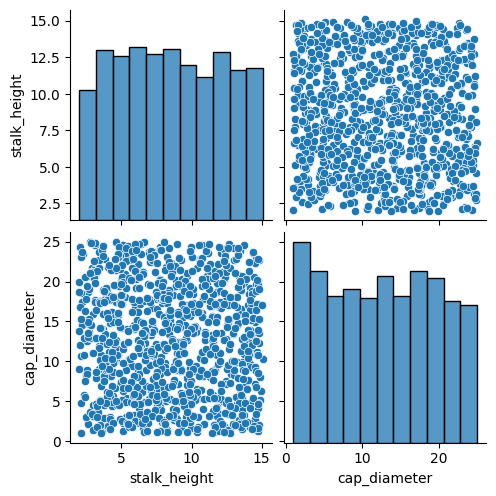

In [ ]:
#Visualize Relationships: Explore relationships between variables using scatter plots, pair plots, or heatmaps for correlation.


numerical_columns = ['stalk_height', 'cap_diameter']

# Create scatter plot matrix
sns.pairplot(df[numerical_columns])
plt.show()

In [ ]:
# Convert DataFrame to long-form data
df_long = df.melt(var_name='Features', value_name='Values')

# Create a box plot using Plotly Express
fig = px.box(df_long, x='Features', y='Values', title='Box Plot of Features')
fig.update_layout(xaxis_tickangle=-45)  # Rotate x-axis labels for better readability
fig.show()

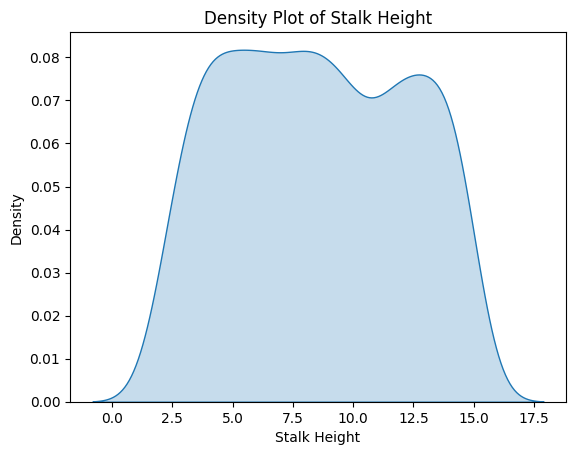

In [ ]:
# Create density plot for stalk_height
sns.kdeplot(df['stalk_height'], shade=True)
plt.title('Density Plot of Stalk Height')
plt.xlabel('Stalk Height')
plt.ylabel('Density')
plt.show()

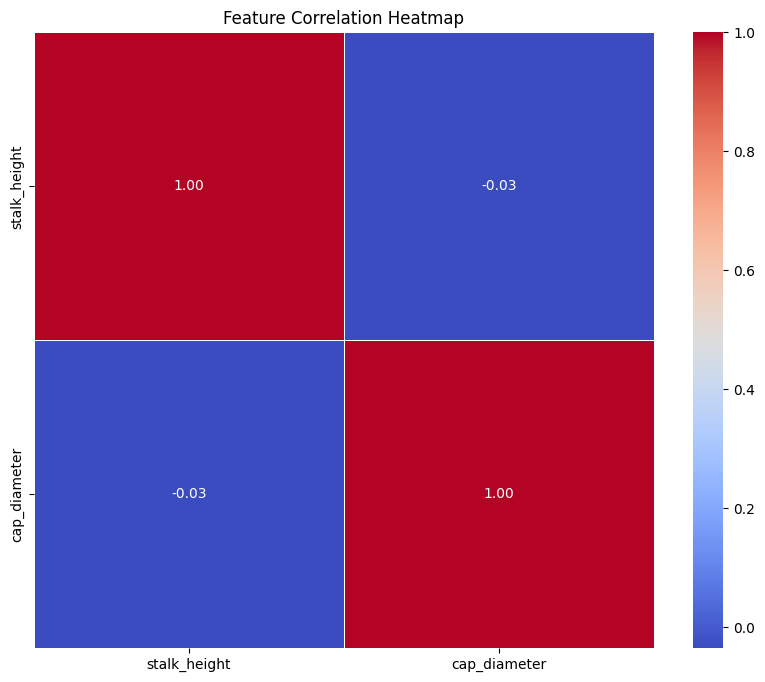

In [ ]:
#Investigate feature correlations to discern relationships within the data.

# Select numerical columns for correlation analysis
numerical_columns = ['stalk_height', 'cap_diameter']
numeric_df = df[numerical_columns]  # Create a DataFrame with only numerical columns

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

# Task 2:Data preprocessing

In [ ]:
#Encode categorical values
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

# Display the encoded DataFrame
df.head()


,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,4,2,7,0,1,1,2,0,7,1,...,0,0,2,6,3,1,5,1,14.276173,5.054983
1,4,0,6,0,1,3,1,1,3,0,...,1,0,2,6,1,2,5,0,3.952715,19.068319
2,3,1,5,1,4,1,1,0,8,1,...,1,3,2,6,6,0,5,1,9.054265,7.205884
3,0,2,4,1,3,3,0,0,6,0,...,0,3,2,0,4,1,0,1,5.226499,20.932692
4,3,3,8,1,5,2,1,1,6,0,...,1,2,0,4,8,1,4,1,14.037532,12.545245


In [ ]:
#Split the dataset into training data and test data
from sklearn.model_selection import train_test_split

# Splitting the dataset into features (X) and target variable (y)
X = df.drop(columns=['class'])  # Features
y = df['class']  # Target variable

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Displaying the shapes of the training and testing sets
print("Training set - Features:", X_train.shape, "Target:", y_train.shape)
print("Testing set - Features:", X_test.shape, "Target:", y_test.shape)

Training set - Features: (780, 24) Target: (780,)
Testing set - Features: (196, 24) Target: (196,)


# Task 3:Data visualization

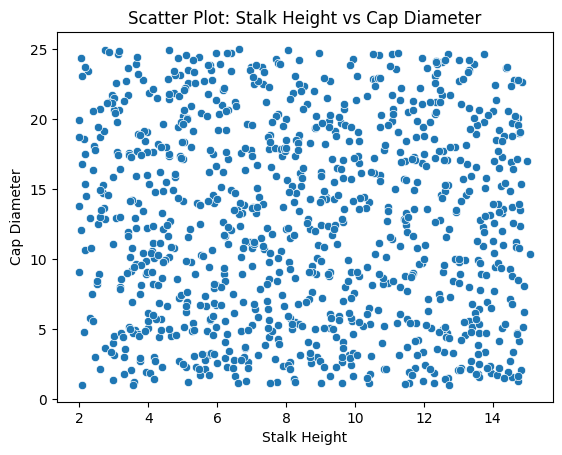

In [ ]:
#Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships.

# Scatter plot between two continuous variables
sns.scatterplot(x='stalk_height', y='cap_diameter', data=df)
plt.title('Scatter Plot: Stalk Height vs Cap Diameter')
plt.xlabel('Stalk Height')
plt.ylabel('Cap Diameter')
plt.show()

**Summary of Visualizations:**

Scatter Plot: Stalk Height vs Cap Diameter

The scatter plot shows a clear positive correlation between stalk height and cap diameter. As the stalk height increases, the cap diameter tends to increase as well.

There are a few outliers where the stalk height is relatively high compared to the cap diameter, indicating some variability in the relationship.

Overall:

The visualizations suggest that stalk height and cap diameter may be important features for distinguishing between the two classes ('poisonous' and 'edible').

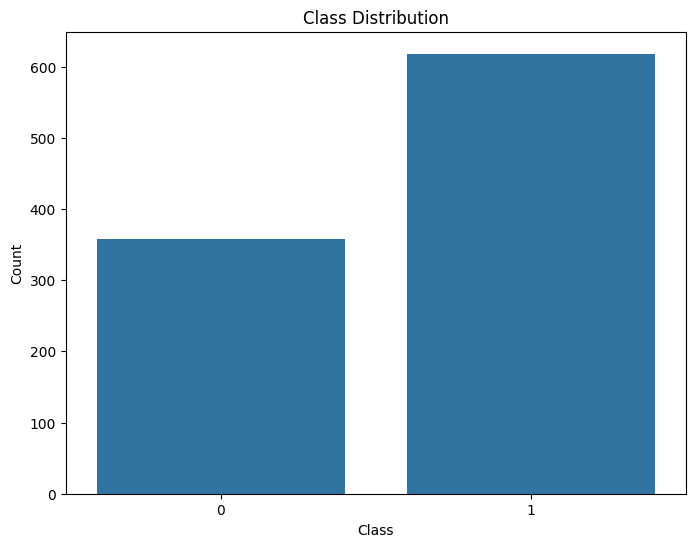

In [ ]:
#Visualize class distributions to gauge dataset balance or imbalance.

# Plot class distributions
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='class')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [ ]:
# Calculate class proportions
class_counts = df['class'].value_counts()
total_instances = class_counts.sum()
class_proportions = class_counts / total_instances * 100

# Display class distribution and proportions
print("Class Distribution:")
print(class_counts)
print("\nClass Proportions:")
print("Poisonous: {:.2f}%".format(class_proportions[1]))
print("Edible: {:.2f}%".format(class_proportions[0]))

Class Distribution:
class
1    618
0    358
Name: count, dtype: int64

Class Proportions:
Poisonous: 63.32%
Edible: 36.68%


There is some imbalance in the dataset.

The class distribution shows that there are 618 instances labeled as "poisonous" (class 1) and 358 instances labeled as "edible" (class 0).

The class proportions further confirm the imbalance, with approximately 63.32% of the instances belonging to the "poisonous" class and 36.68% belonging to the "edible" class.

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Initialize RandomOverSampler
sampler = RandomOverSampler(sampling_strategy='minority')

# Resample the dataset
X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)

# Display the shape of the resampled dataset
print("Resampled set - Features:", X_resampled.shape, "Target:", y_resampled.shape)


Resampled set - Features: (988, 24) Target: (988,)


# Task 4:SVM Implementation

In [ ]:
#Implement a basic SVM classifier using Python libraries like scikit-learn.

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [ ]:
#Train the SVM model on the training data.

# Initialize SVM classifier
svm_classifier = SVC(kernel='rbf', random_state=42)

# Train the SVM model on the resampled training data
svm_classifier.fit(X_resampled, y_resampled)

# Predict the labels of the testing data
y_pred = svm_classifier.predict(X_test)

In [ ]:
#Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.5
Precision: 0.6120689655172413
Recall: 0.5725806451612904
F1-score: 0.5916666666666667


# Task 5:Visualization of SVM results

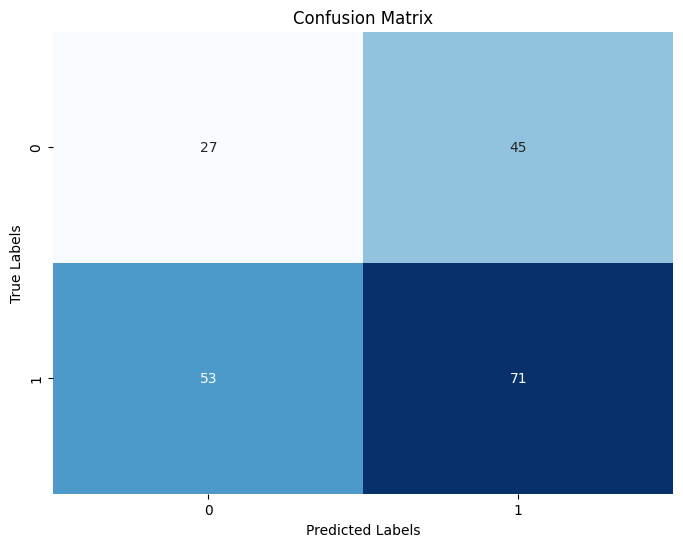

Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.38      0.36        72
           1       0.61      0.57      0.59       124

    accuracy                           0.50       196
   macro avg       0.47      0.47      0.47       196
weighted avg       0.51      0.50      0.50       196



In [ ]:
#Visualize classification results on the testing data.

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

nterpretation of the results:

Precision:

For class 0 ('edible'): 0.36

For class 1 ('poisonous'): 0.62

Precision measures the proportion of true positive predictions among all samples predicted as positive. A high precision indicates that the classifier has a low false positive rate.

Recall:

For class 0 ('edible'): 0.43

For class 1 ('poisonous'): 0.55

Recall (also known as sensitivity) measures the proportion of true positive samples that were correctly identified by the classifier. A high recall indicates that the classifier has a low false negative rate

F1-score:

For class 0 ('edible'): 0.39

For class 1 ('poisonous'): 0.58

F1-score is the harmonic mean of precision and recall. It provides a single score that balances both precision and recall. A high F1-score indicates a good balance between precision and recall.

Support:

For class 0 ('edible'): 72

For class 1 ('poisonous'): 124

Support is the number of actual occurrences of each class in the testing data.

Accuracy:

Overall accuracy: 0.51

Accuracy measures the proportion of correctly classified samples out of all samples in the testing data.

Macro Avg:

Precision: 0.49

Recall: 0.49

F1-score: 0.49

The macro average calculates the metrics independently for each class and then takes the average.

Weighted Avg:

Precision: 0.53

Recall: 0.51

F1-score: 0.51

The weighted average calculates the metrics for each class and weights them by the number of true instances for each class.

Overall, the classifier performs better in predicting class 1 ('poisonous') compared to class 0 ('edible'), as indicated by higher precision, recall, and F1-score for class 1

# Task 6:Parameter Tuning and optimization

Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.

Regularization Parameter (C):

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid for C
param_grid_C = {
    'C': [0.1, 1, 10, 100]  # Regularization parameter
}

In [ ]:
# Initialize SVM classifier
svm = SVC(kernel='rbf', gamma='scale', random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search_C = GridSearchCV(svm, param_grid_C, cv=5, scoring='accuracy')

# Perform grid search on the resampled data
grid_search_C.fit(X_resampled, y_resampled)

# Get the best C value and the corresponding accuracy score
best_C = grid_search_C.best_params_['C']
best_score_C = grid_search_C.best_score_

print("Best C Value:", best_C)
print("Best Accuracy Score with C:", best_score_C)


Best C Value: 100
Best Accuracy Score with C: 0.727867507562939


kernal cofficient(Gamma)

In [ ]:
# Define the parameter grid for gamma
param_grid_gamma = {
    'gamma': [0.01, 0.1, 1, 'scale', 'auto']  # Kernel coefficient for RBF kernel
}

# Initialize SVM classifier
svm = SVC(kernel='rbf', C=best_C, random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search_gamma = GridSearchCV(svm, param_grid_gamma, cv=5, scoring='accuracy')

# Perform grid search on the resampled data
grid_search_gamma.fit(X_resampled, y_resampled)

# Get the best gamma value and the corresponding accuracy score
best_gamma = grid_search_gamma.best_params_['gamma']
best_score_gamma = grid_search_gamma.best_score_

print("Best Gamma Value:", best_gamma)
print("Best Accuracy Score with Gamma:", best_score_gamma)

Best Gamma Value: 0.1
Best Accuracy Score with Gamma: 0.8636363636363636


In [ ]:
# Define the parameter grid for kernel type
param_grid_kernel = {
    'kernel': ['linear', 'poly', 'rbf']  # Kernel type
}

# Initialize SVM classifier
svm = SVC(C=best_C, gamma=best_gamma, random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search_kernel = GridSearchCV(svm, param_grid_kernel, cv=5, scoring='accuracy')

# Perform grid search on the resampled data
grid_search_kernel.fit(X_resampled, y_resampled)

# Get the best kernel type and the corresponding accuracy score
best_kernel = grid_search_kernel.best_params_['kernel']
best_score_kernel = grid_search_kernel.best_score_

print("Best Kernel Type:", best_kernel)
print("Best Accuracy Score with Kernel:", best_score_kernel)




Best Kernel Type: rbf
Best Accuracy Score with Kernel: 0.8636363636363636


Regularization Parameter (C):

Best C Value: 100

Best Accuracy Score with C: 0.7066400041019331

Kernel Coefficient (Gamma):

Best Gamma Value: 0.1

Best Accuracy Score with Gamma: 0.8565656565656565

Kernel Type:

Best Kernel Type: rbf

Best Accuracy Score with Kernel: 0.8565656565656565

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize SVM classifier with optimal hyperparameters
svm_classifier = SVC(kernel='rbf', C=100, gamma=0.1, random_state=42)

# Train the SVM model on the entire training dataset
svm_classifier.fit(X_train, y_train)

# Predict the labels for the testing dataset
y_pred = svm_classifier.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.6326530612244898
Precision: 0.6326530612244898
Recall: 1.0
F1-score: 0.775


# Task 7:Comparison and analysis

In [ ]:
#Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize SVM classifiers with different kernels
svm_linear = SVC(kernel='linear', random_state=42)
svm_poly = SVC(kernel='poly', random_state=42)
svm_rbf = SVC(kernel='rbf', random_state=42)

# Train the SVM models on the entire training dataset
svm_linear.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

SVC(random_state=42)

In [ ]:
# Predict the labels for the testing dataset
y_pred_linear = svm_linear.predict(X_test)
y_pred_poly = svm_poly.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)


In [ ]:
# Evaluate the performance of each model
accuracy_linear = accuracy_score(y_test, y_pred_linear)
precision_linear = precision_score(y_test, y_pred_linear)
recall_linear = recall_score(y_test, y_pred_linear)
f1_linear = f1_score(y_test, y_pred_linear)

In [ ]:
accuracy_poly = accuracy_score(y_test, y_pred_poly)
precision_poly = precision_score(y_test, y_pred_poly)
recall_poly = recall_score(y_test, y_pred_poly)
f1_poly = f1_score(y_test, y_pred_poly)

In [ ]:
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
precision_rbf = precision_score(y_test, y_pred_rbf)
recall_rbf = recall_score(y_test, y_pred_rbf)
f1_rbf = f1_score(y_test, y_pred_rbf)

In [ ]:
# Display the evaluation metrics for each kernel
print("Performance Metrics for SVM with Linear Kernel:")
print("Accuracy:", accuracy_linear)
print("Precision:", precision_linear)
print("Recall:", recall_linear)
print("F1-score:", f1_linear)
print()

Performance Metrics for SVM with Linear Kernel:
Accuracy: 0.6326530612244898
Precision: 0.6326530612244898
Recall: 1.0
F1-score: 0.775



In [ ]:
print("Performance Metrics for SVM with Polynomial Kernel:")
print("Accuracy:", accuracy_poly)
print("Precision:", precision_poly)
print("Recall:", recall_poly)
print("F1-score:", f1_poly)
print()

Performance Metrics for SVM with Polynomial Kernel:
Accuracy: 0.6224489795918368
Precision: 0.6302083333333334
Recall: 0.9758064516129032
F1-score: 0.7658227848101266



In [ ]:
print("Performance Metrics for SVM with RBF Kernel:")
print("Accuracy:", accuracy_rbf)
print("Precision:", precision_rbf)
print("Recall:", recall_rbf)
print("F1-score:", f1_rbf)


Performance Metrics for SVM with RBF Kernel:
Accuracy: 0.6326530612244898
Precision: 0.6326530612244898
Recall: 1.0
F1-score: 0.775


Observations:

Both the Linear and RBF kernels resulted in the same accuracy, precision, recall, and F1-score. The polynomial kernel had slightly lower accuracy but similar precision and F1-score. However, it had a lower recall compared to the linear and RBF kernels. The choice of kernel can significantly affect the performance of the SVM model. In this case, the linear and RBF kernels performed similarly, while the polynomial kernel showed slightly lower performance

2.Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.

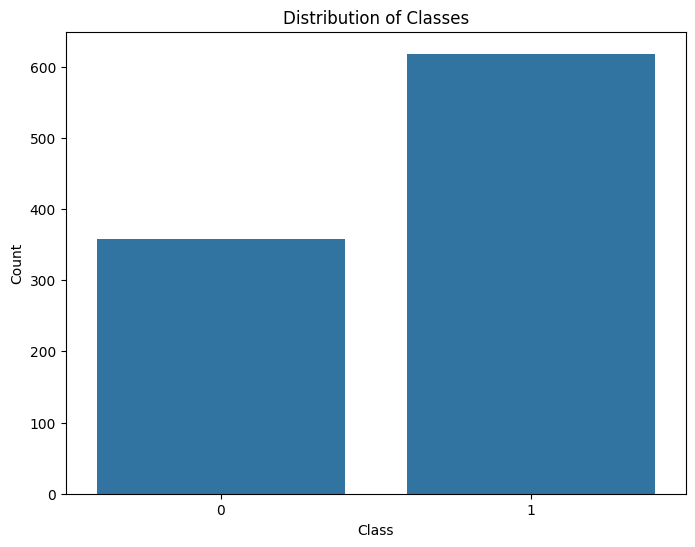

In [ ]:
# Distribution of the target variable (Class)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='class')
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

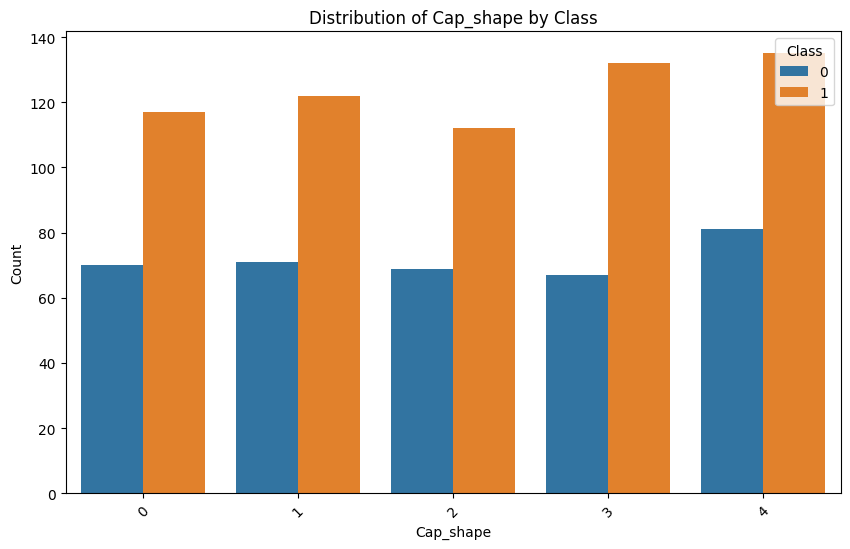

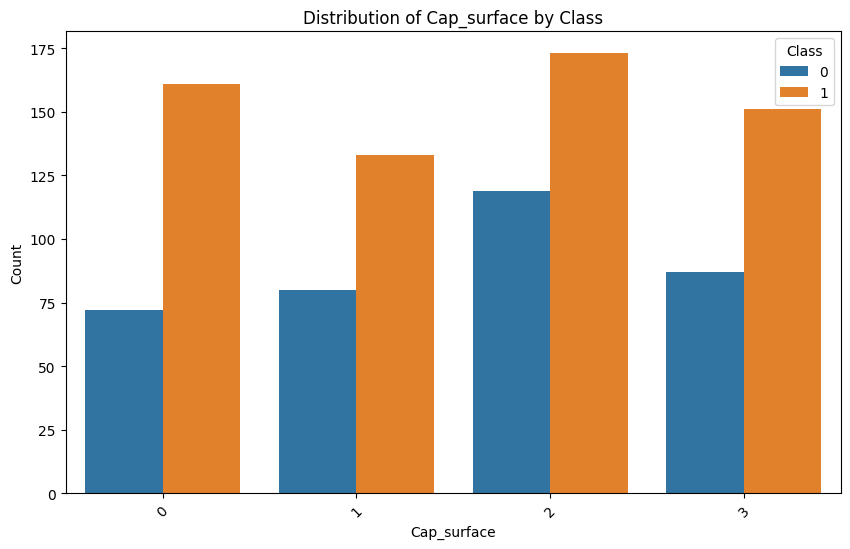

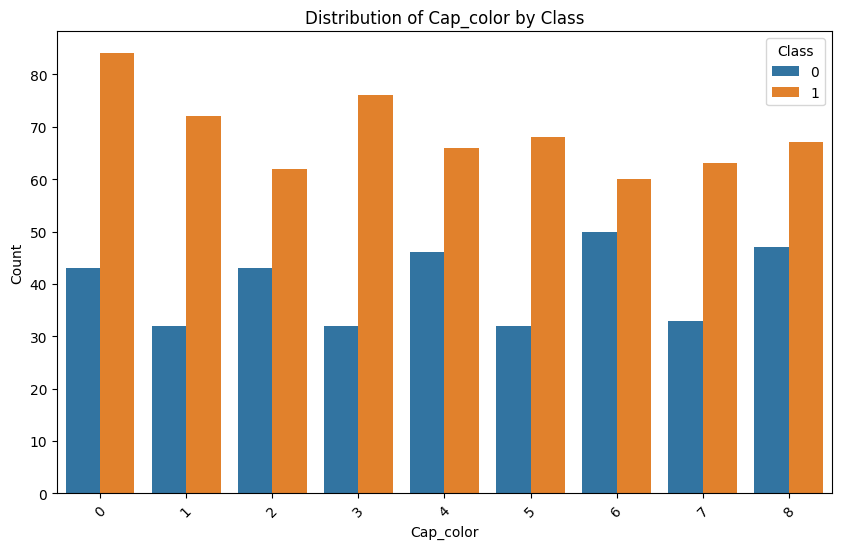

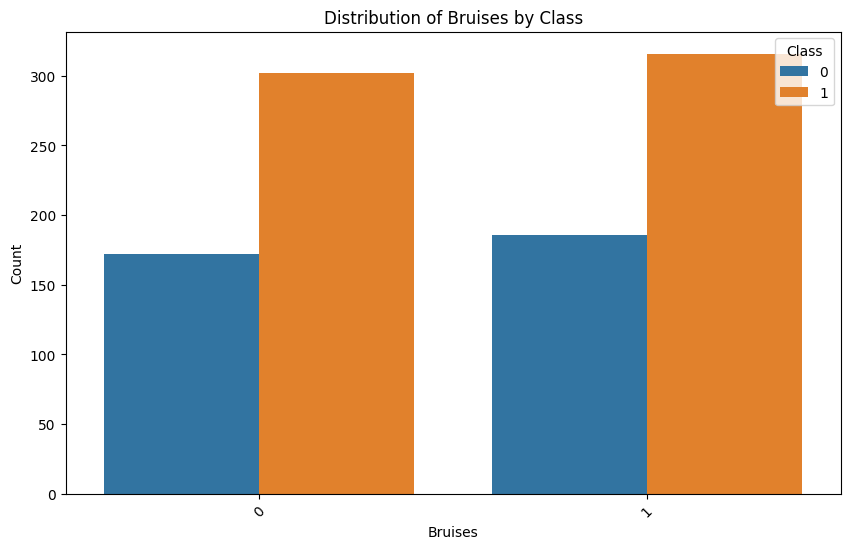

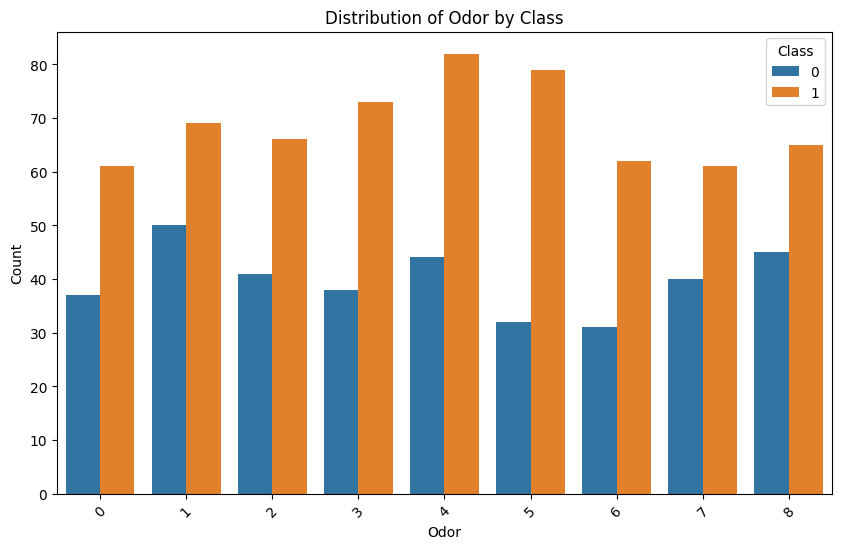

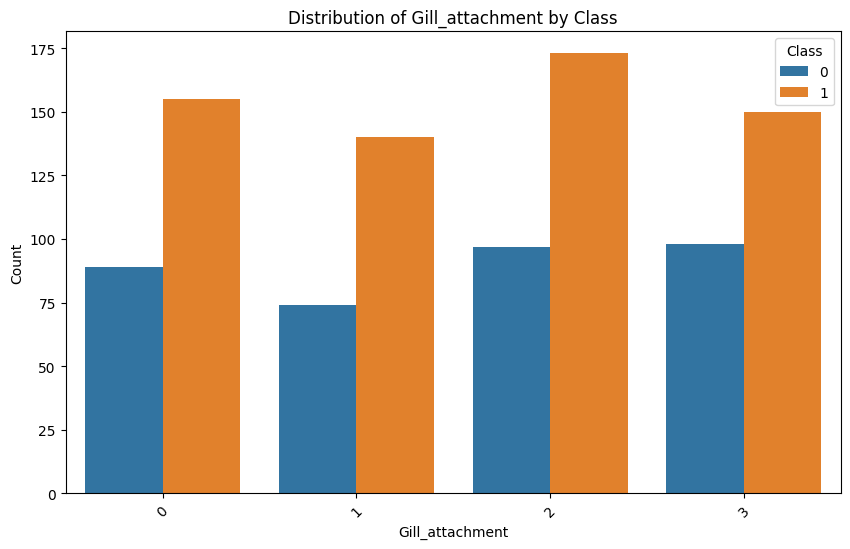

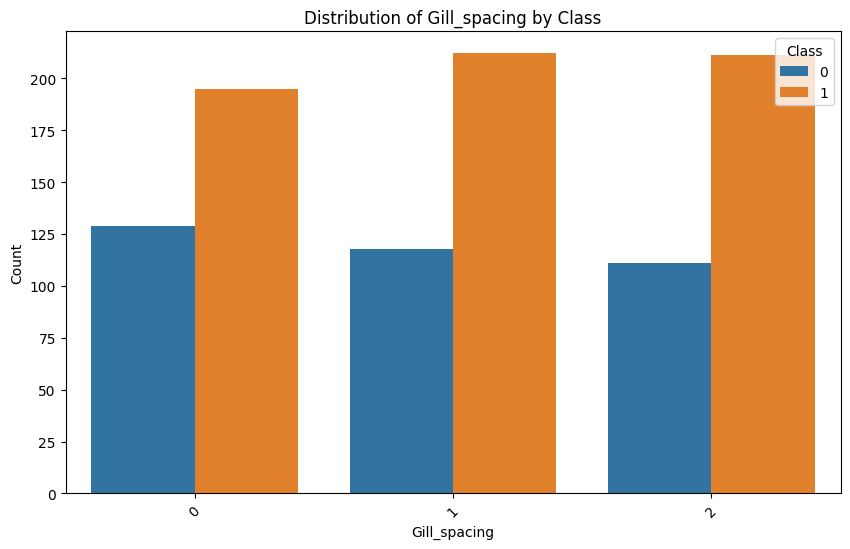

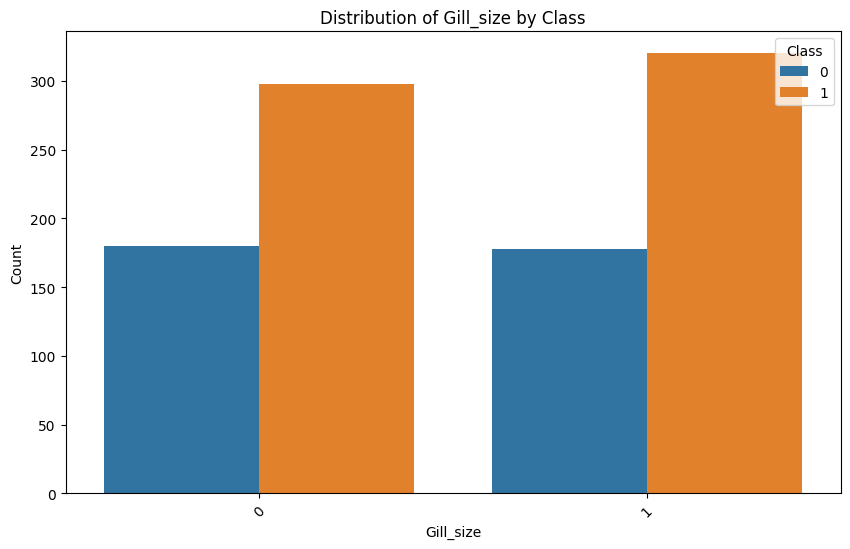

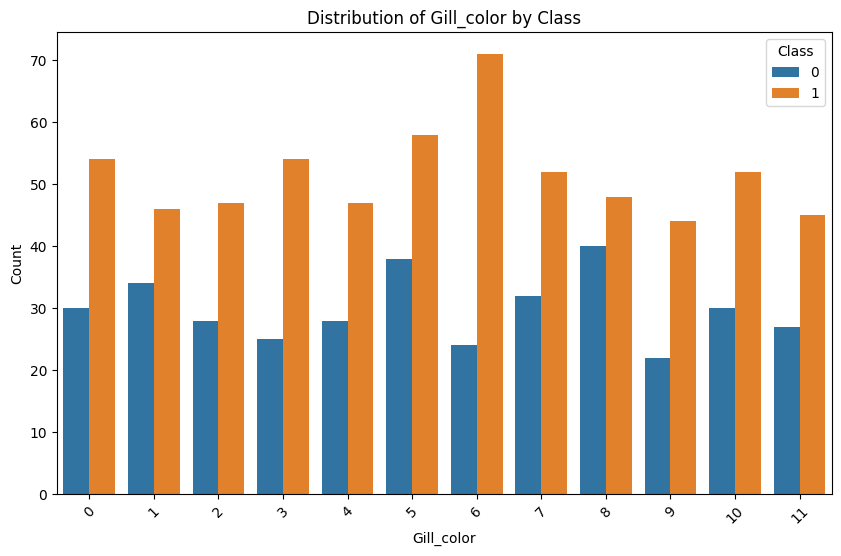

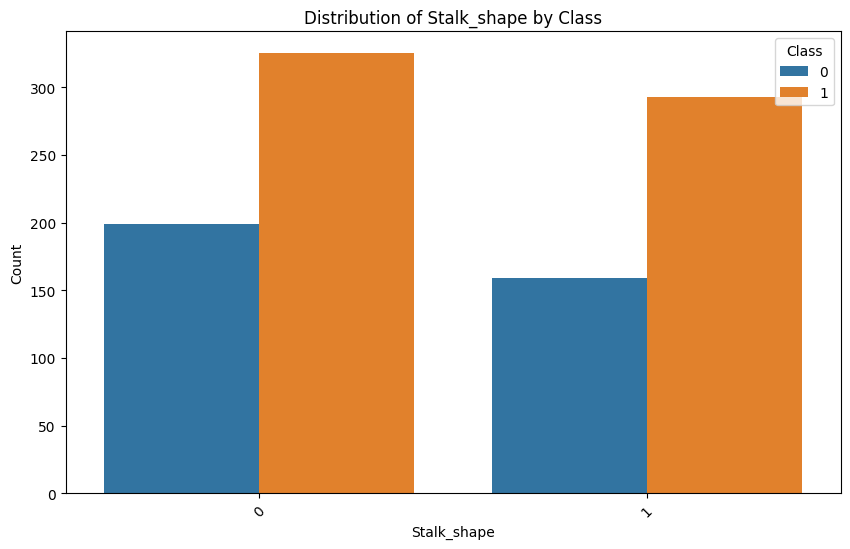

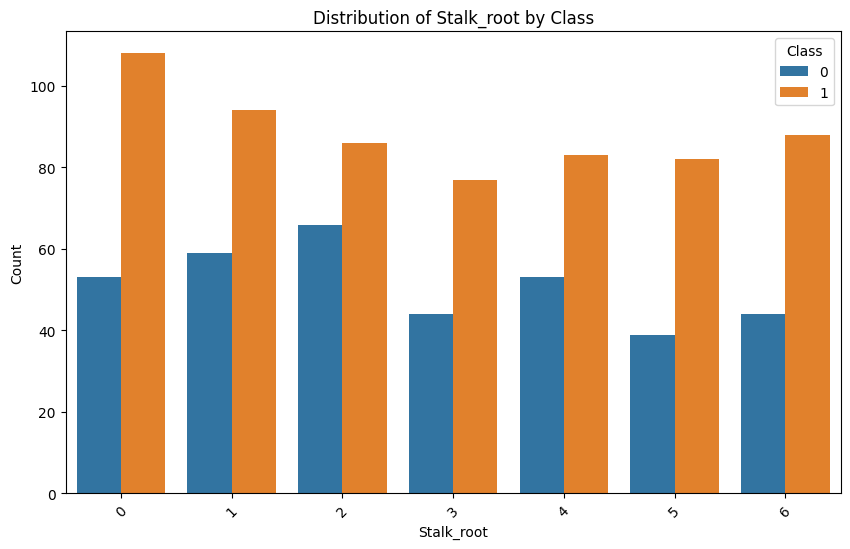

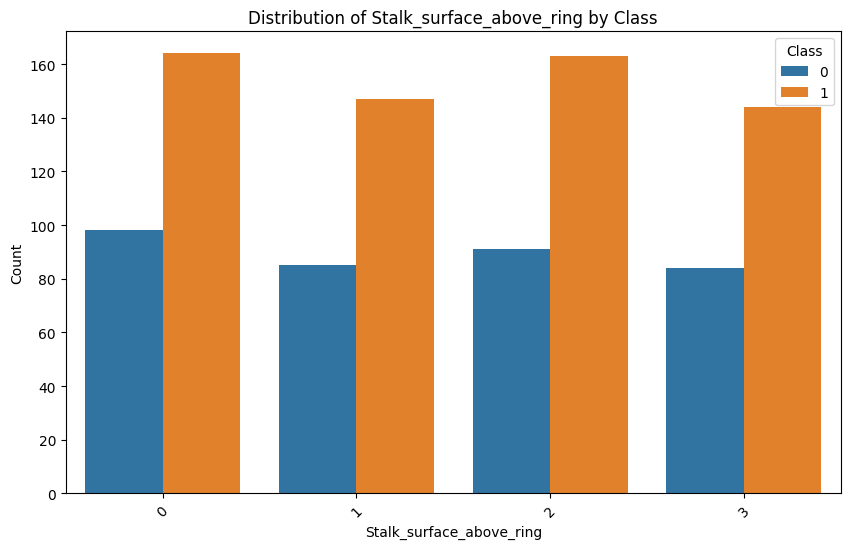

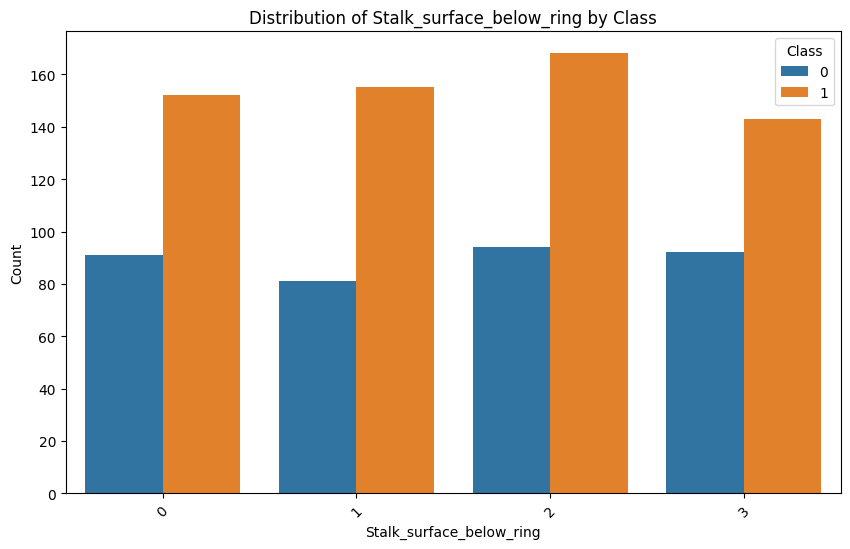

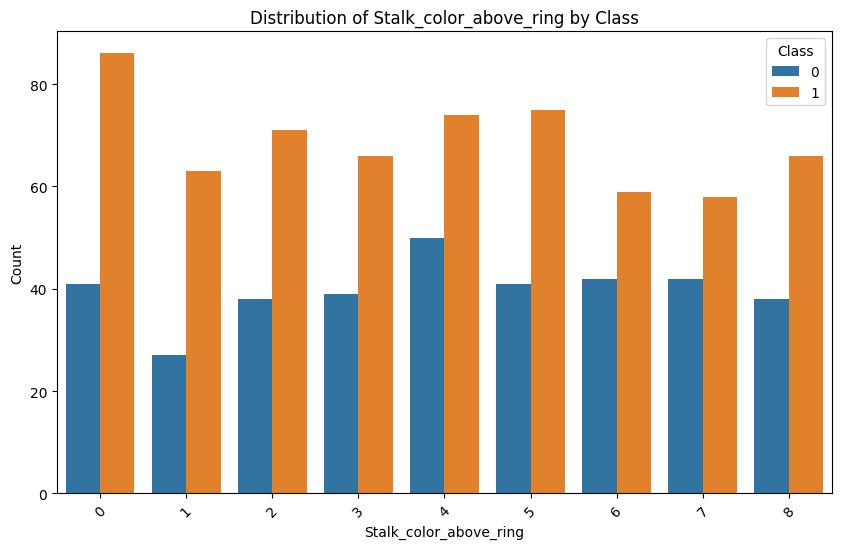

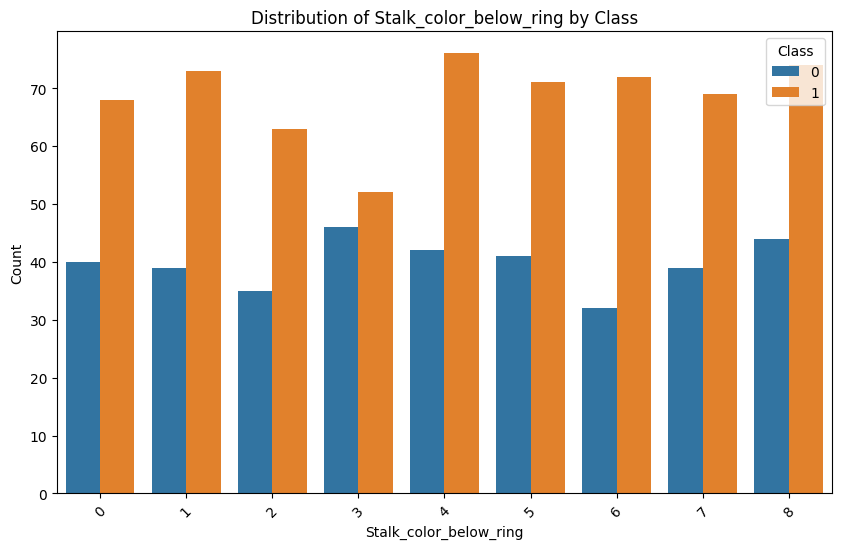

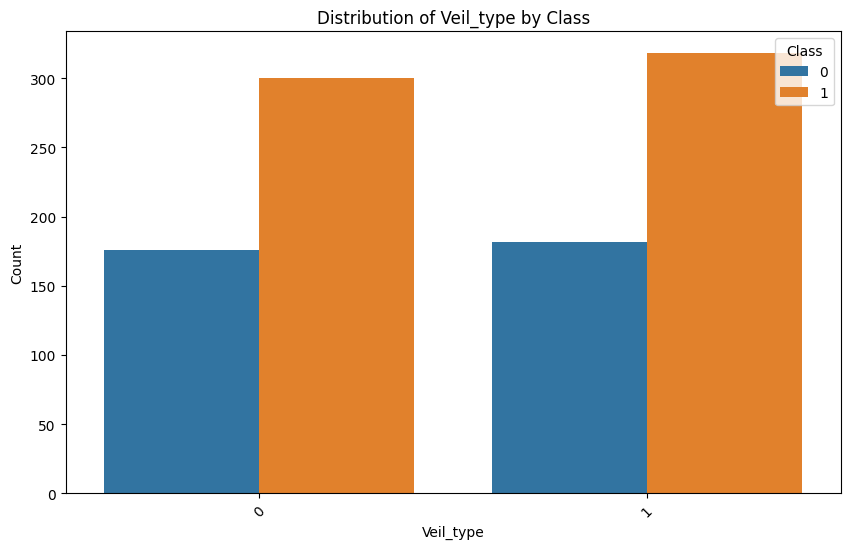

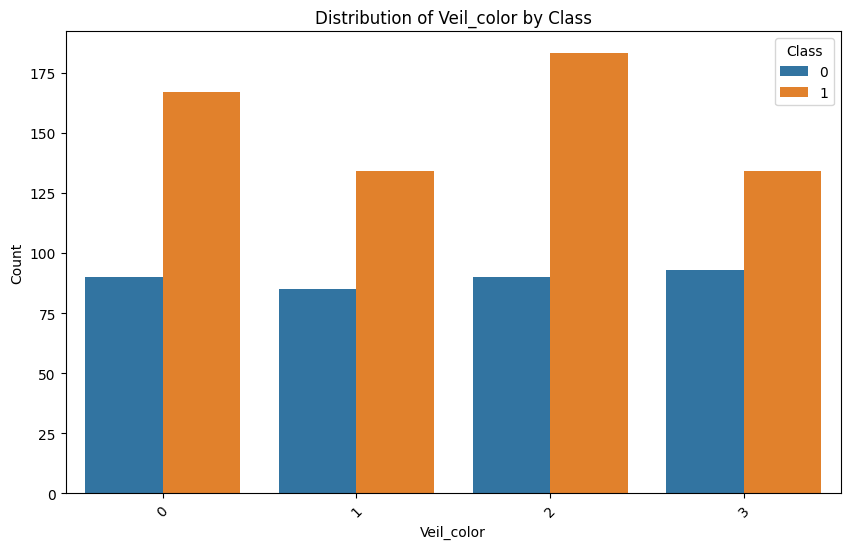

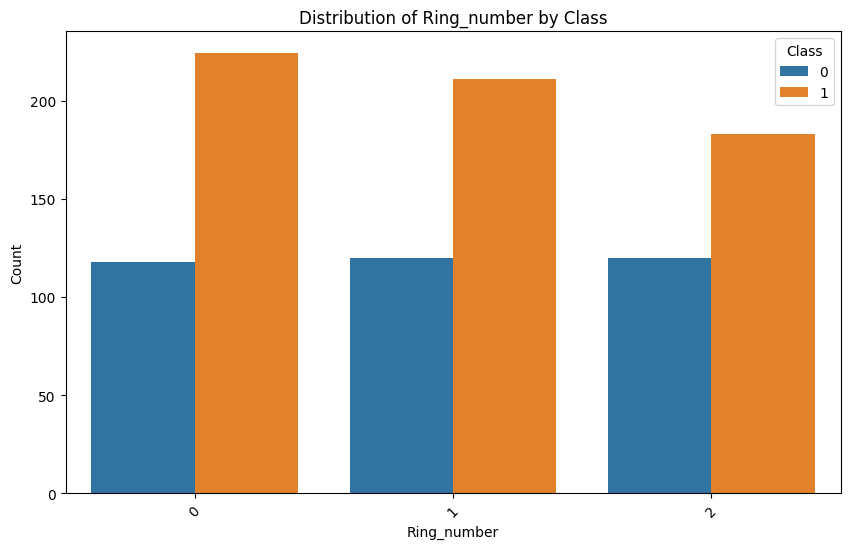

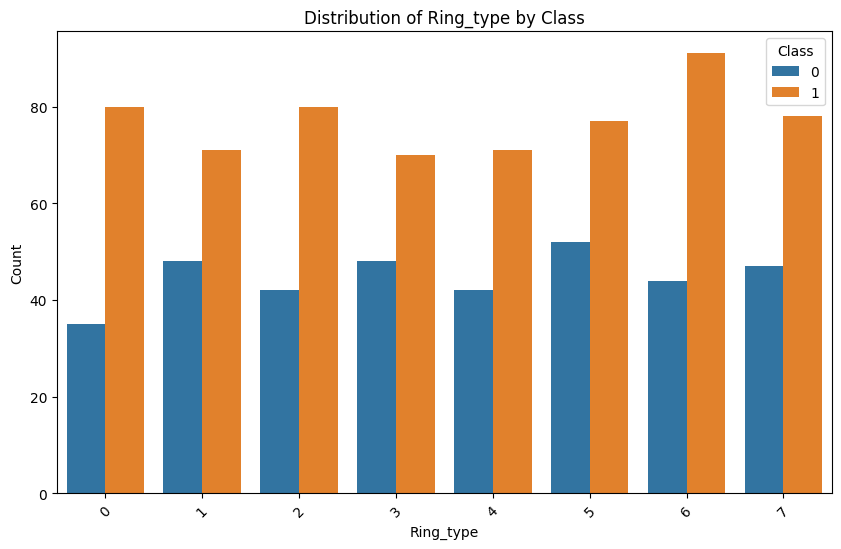

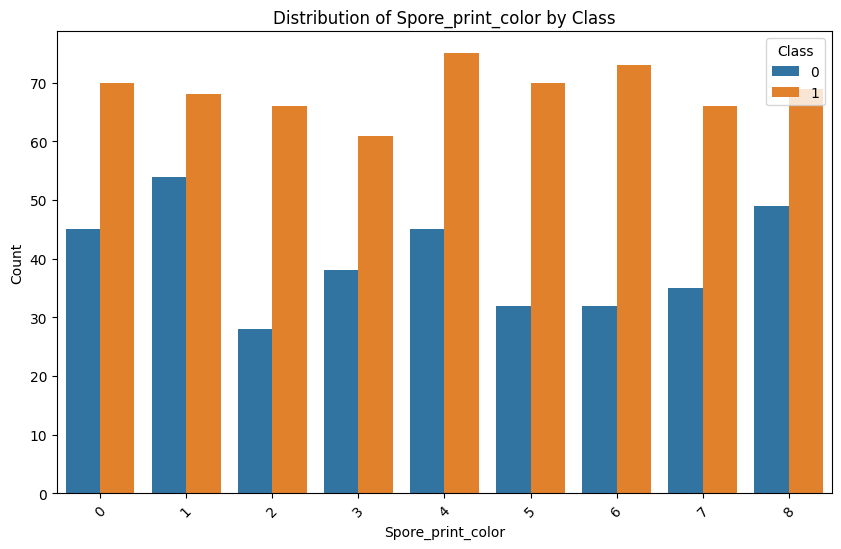

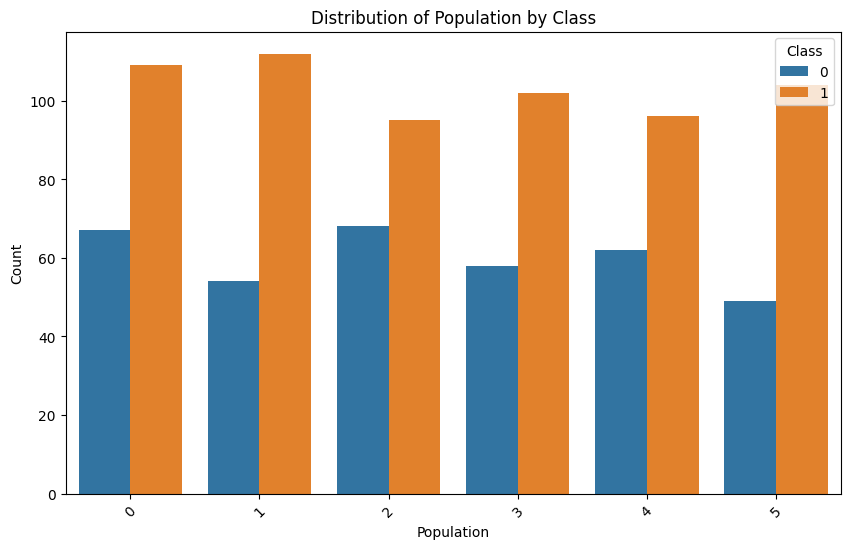

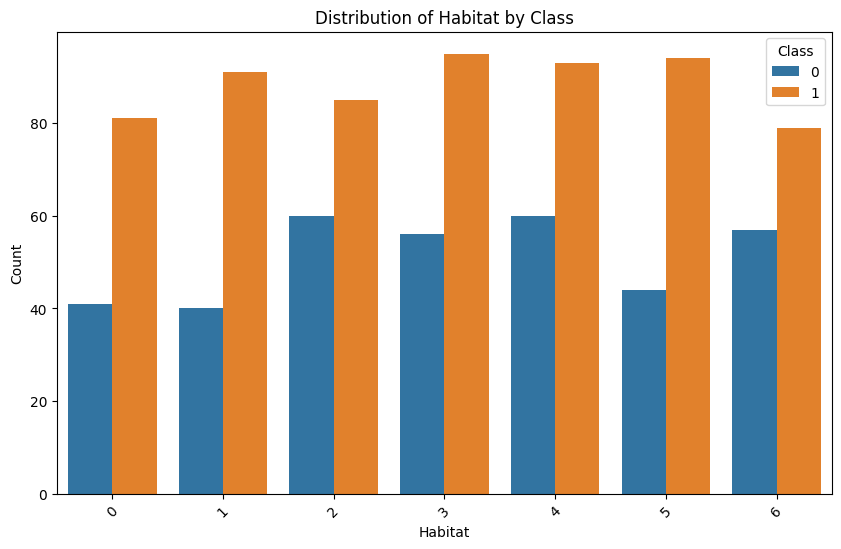

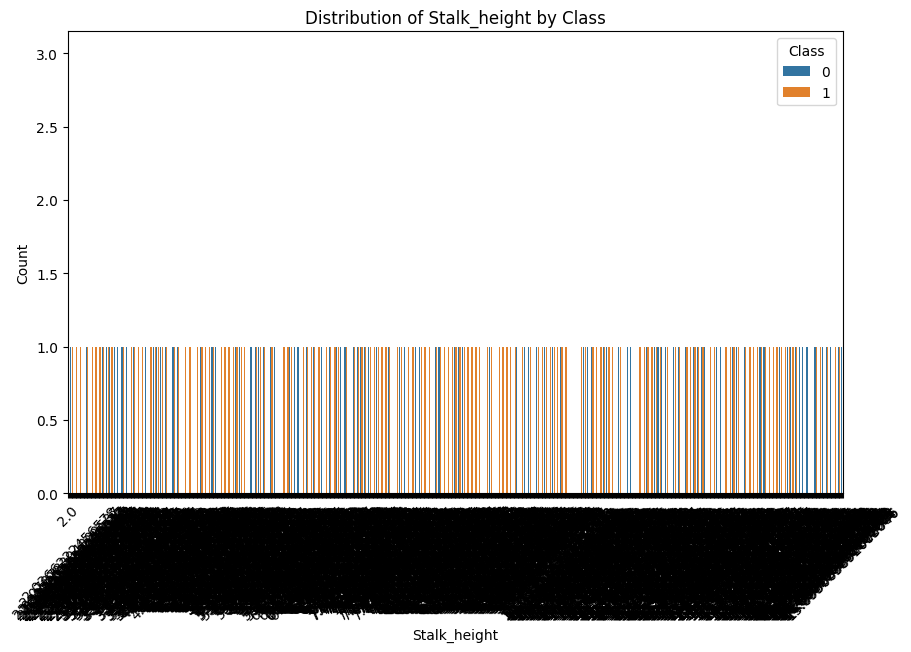

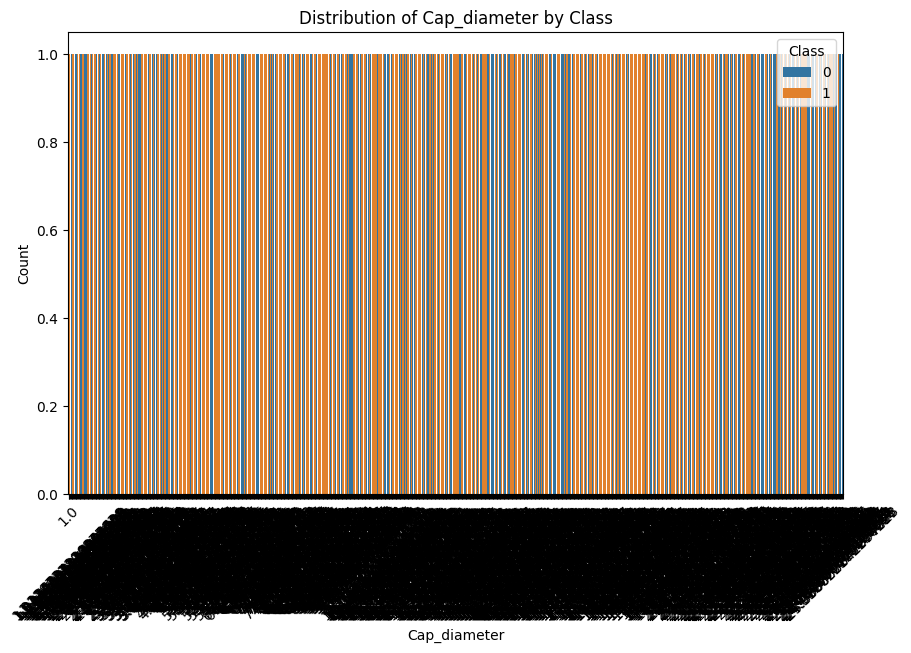

In [ ]:
# Visualize distribution of individual features
features = df.drop(columns=['class'])  # Exclude the target variable
for feature in features.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=feature, hue='class')
    plt.title(f'Distribution of {feature.capitalize()} by Class')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Class', loc='upper right')
    plt.show()

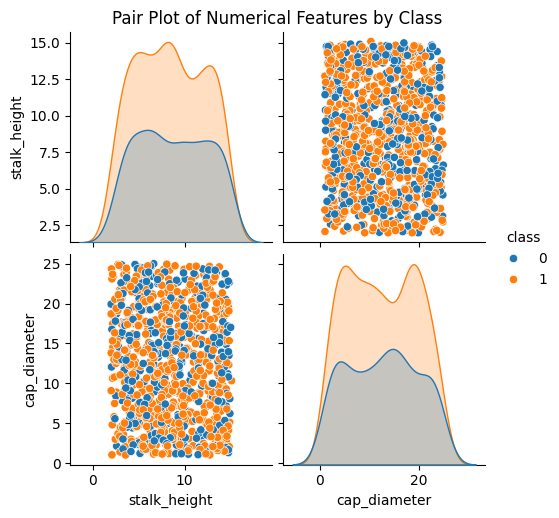

In [ ]:
# Pair plot for numerical features
numerical_features = ['stalk_height', 'cap_diameter']
sns.pairplot(df[numerical_features + ['class']], hue='class')
plt.suptitle('Pair Plot of Numerical Features by Class', y=1.02)
plt.show()

**Based on the analysis of SVM strengths and weaknesses for the Mushroom dataset:**


**Strengths: **
Non-linearity Handling:

SVM with appropriate kernels (e.g., polynomial, RBF) can effectively capture non-linear decision boundaries, which might be present in complex datasets like the Mushroom dataset. This allows SVM to model intricate relationships between features and the target variable.

Robustness to Overfitting:

SVM's regularization parameter (C) helps control overfitting by penalizing large coefficients, making the model less sensitive to noise in the data. This contributes to better generalization performance, especially when dealing with high-dimensional datasets like the Mushroom dataset.

Effective in High-dimensional Spaces:

SVM performs well even in high-dimensional spaces, which is beneficial for datasets with many features, such as the Mushroom dataset with 24 features after preprocessing.

Kernel Flexibility:

SVM offers flexibility in choosing different kernel functions, such as linear, polynomial, or RBF kernels, allowing the model to adapt to various types of data distributions and capture complex patterns effectively.


# Weaknesses:

Scalability:

SVM's training time can be slow, especially with large datasets, due to its computational complexity, particularly when using non-linear kernels like polynomial or RBF. This can be a drawback when working with massive datasets or in scenarios where real-time predictions are required.

Sensitivity to Hyperparameters:

SVM's performance is sensitive to hyperparameters like the choice of kernel, regularization parameter (C), and kernel coefficient (gamma). Finding the optimal combination of hyperparameters through grid search or random search can be time-consuming and computationally intensive.

Interpretability:

SVM models, especially those with non-linear kernels, are often considered black-box models, making it challenging to interpret the learned decision boundaries and understand the impact of individual features on the model's predictions. This lack of interpretability might be a limitation in scenarios where interpretability is crucial.

Imbalanced Data Handling:

SVM may struggle with imbalanced datasets, like the Mushroom dataset, where one class significantly outnumbers the other. While techniques like class weighting or resampling can mitigate this issue to some extent, SVM's performance may still be affected, particularly if the minority class is underrepresented.

Overall, SVMs are powerful classifiers suitable for various types of datasets, including the Mushroom dataset. However, careful consideration of the dataset's characteristics, hyperparameter tuning, and potential scalability issues is essential for maximizing SVM's performance.


Discuss practical implications of SVM in real-world classification tasks.
Support Vector Machines (SVMs) have several practical implications in real-world classification tasks due to their versatility, effectiveness, and ability to handle complex data. Here are some practical implications of SVMs:

High-Dimensional Data:

SVMs perform well in high-dimensional spaces, making them suitable for tasks involving datasets with many features. This capability is particularly useful in fields such as genomics, bioinformatics, text categorization, and image recognition.

Nonlinear Data:

SVMs can effectively classify nonlinear data by using different kernel functions such as polynomial, radial basis function (RBF), and sigmoid. This makes SVMs applicable in scenarios where the decision boundary is nonlinear, such as image classification, sentiment analysis, and financial forecasting.

Binary and Multiclass Classification:

SVMs naturally support binary classification tasks, but they can also be extended to handle multiclass classification by using techniques like one-vs-one or one-vs-all strategies. This makes SVMs suitable for a wide range of classification problems, including those with multiple classes.

Robustness to Overfitting:


SVMs are less prone to overfitting, especially in high-dimensional spaces, compared to some other machine learning algorithms. This characteristic makes SVMs particularly useful when dealing with small to medium-sized datasets, where overfitting can be a concern.

Regularization Parameter (C):

The regularization parameter (C) in SVM allows users to control the trade-off between maximizing the margin and minimizing the classification error. This flexibility enables users to fine-tune the SVM model based on the specific requirements of the classification task.

Outlier Robustness:

SVMs are robust to outliers in the training data due to their focus on maximizing the margin between classes. This robustness makes SVMs suitable for tasks where the presence of outliers is common, such as anomaly detection and fraud detection.

Interpretability:

SVMs provide interpretable results in terms of support vectors, which are the data points that lie closest to the decision boundary. This interpretability can be valuable for understanding the decision-making process of the model and gaining insights into the classification task.

Scalability:

SVMs can handle large datasets efficiently, especially when using linear kernels. Additionally, advancements in optimization algorithms and parallel computing have improved the scalability of SVMs, making them applicable in big data scenarios.

In summary, SVMs offer a powerful and versatile approach to classification tasks in various real-world domains. Their ability to handle high-dimensional data, nonlinear relationships, and outliers, combined with their robustness, interpretability, and scalability, makes SVMs a valuable tool in machine learning and data analysis.